# Test imbalanced sampler for RNN

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from navi.datasets.frames_embeddings import FramesWithContextDataset
from navi.transforms import ToTensor
from navi.sampler.imbalance_sampler import ImbalancedDatasetSampler

In [5]:
def load_metadata():
    videos = pd.read_csv("../data/maps/mapping.csv")
    root = "/home/rob/Documents/Github/navi_lstm/data/embeddings_nnunet"
    with open("../prep/predictions.json", 'rb') as file:
        label_map = json.load(file)
    return root, videos, label_map

root, videos, label_map = load_metadata()

In [6]:
transform = ToTensor()

dataset = FramesWithContextDataset(root, videos, label_map, context_size=5, transform=transform)
len(dataset)

Loading embeddings...
Loading targets...
Indexing frames...
Dataset loaded.


746403

In [7]:
example_embedding, example_target = dataset[0]
example_embedding.shape, example_target

(torch.Size([6, 2016]), 0)

{0: 617156, 1: 129247}


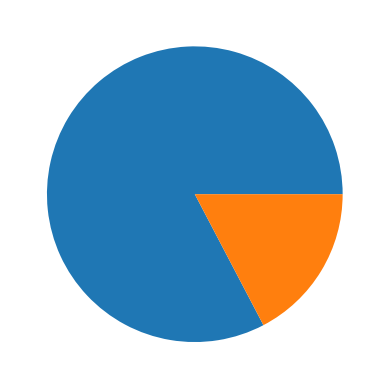

In [8]:
counts = {0: 0, 1: 0}
for _, target in dataset:
    counts[target] += 1
counts
print(counts)
plt.figure()
plt.pie(counts.values())
plt.show()

In [11]:
from torch.utils.data import DataLoader

sampler = ImbalancedDatasetSampler(dataset, num_samples=250000)
data_loader = DataLoader(dataset, batch_size=1, sampler=sampler)
next(iter(data_loader))

KeyboardInterrupt: 

In [ ]:
counts = {0: 0, 1: 0}
for _, target in data_loader:
    counts[target[0].item()] += 1
counts

plt.figure()
plt.pie(counts.values())
plt.show()

In [10]:
import torch
torch.__version__

'2.0.1+cu117'